In [16]:
import photutils, astropy, math
from photutils import datasets
from astropy.modeling.functional_models import Sersic2D

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

from astropy import visualization, convolution, stats

import ashd

from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord

import subprocess

#import skimage
#from skimage import morphology, filters

from scipy import ndimage

import sep

#from sklearn.gaussian_process import GaussianProcessRegressor, kernels

from scipy import interpolate, signal

from importlib import reload
import ipywidgets, scanner

#from bokeh.plotting import figure, output_file, show
#from bokeh.io import output_notebook
#output_notebook()

#import mpld3
#mpld3.enable_notebook()

%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 16]

In [4]:
butler = ashd.Butler("/run/media/me/DATA/asas-sn-images/")

norm = visualization.mpl_normalize.ImageNormalize(
    stretch=visualization.SqrtStretch())

def plotme(obj, rng=[10, 99], target=None):
    vmin, vmax = np.percentile(obj, rng)
    f = lambda x: x.imshow(obj, cmap="Greys_r", norm=norm, vmin=vmin, vmax=vmax)
    k = target if target != None else plt
    f(k)

In [5]:
ra_box = ipywidgets.Text(placeholder="ra")
dec_box = ipywidgets.Text(placeholder="dec")
#btn = ipywidgets.Button(description="Find objects")

hbox = ipywidgets.HBox([ra_box, dec_box])
display(hbox)

(2.19617128, 13631, 12848, 1726, 1905, 1419, 1551, 1817.64274669, 1463.17756395, 32.66472345, 18.92405312, 5.69234213, 2.90474446e-07, 2.50788183e-07, 2.58716521e-08, 5.89207172, 4.10758638, 0.34595114, 0.0323076, 0.055766, -0.01943621, 12412634., 12413002., 1065872.75, 1534954.75, 1818, 1463, 1818, 1463, 1)


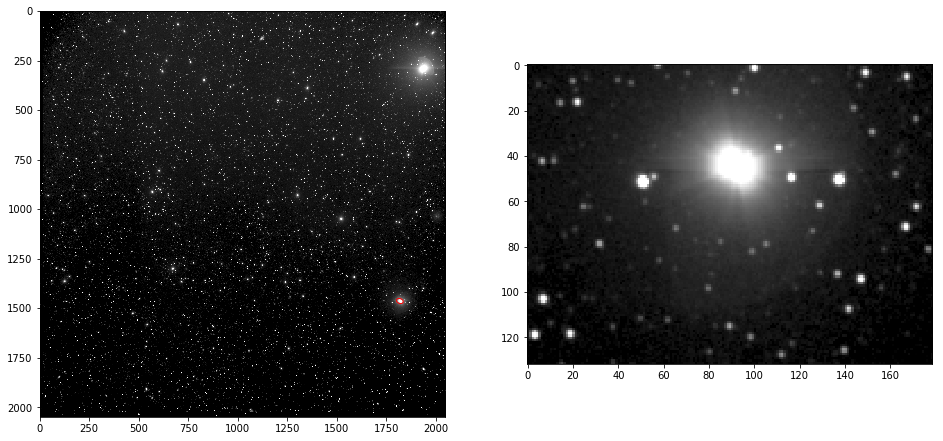

In [14]:
reload(scanner)

img = butler.get_image(ra=ra_box.value, dec=dec_box.value)
dsub = img.data.byteswap().newbyteorder()

objects, *_ = scanner.get_objs(dsub)
obj = scanner.find_lbg(objects, dsub, maxtries=10)
print(obj)

fig, ax = plt.subplots(ncols=2)

plotme(img.data, target=ax[0])

if obj != None:
    e = patches.Ellipse(xy=(obj['x'], obj['y']),
                    width=6*obj['a'],
                    height=6*obj['b'],
                    angle=obj['theta'] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax[0].add_artist(e)

    plotme(img.data[obj['ymin']:obj['ymax'], obj['xmin']:obj['xmax']], target=ax[1])

In [ ]:
row = np.arcsinh(dsub[int(obj['y'])])
plt.plot(row[int(obj['xmin'])-5:int(obj['xmax'])+5], marker='o')

In [17]:
astropy.io.ascii.read('bsc5.dat')

InconsistentTableError: 
ERROR: Unable to guess table format with the guesses listed below:
Reader:Ecsv fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:FixedWidthTwoLine fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:RST fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:FastBasic fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Basic fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:FastRdb fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Rdb fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:FastTab fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Tab fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Cds fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Daophot fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:SExtractor fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Ipac fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Latex fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:AASTex fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:FastCommentedHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastCommentedHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastCommentedHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastCommentedHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastCommentedHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastCommentedHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastCommentedHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastCommentedHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:CommentedHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:CommentedHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:CommentedHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:CommentedHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:CommentedHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:CommentedHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:CommentedHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:CommentedHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastBasic delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastBasic delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastBasic delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastBasic delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastBasic delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastBasic delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastBasic delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastBasic delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:Basic delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:Basic delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:Basic delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:Basic delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastNoHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastNoHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastNoHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastNoHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastNoHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastNoHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastNoHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastNoHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:NoHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:NoHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:NoHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:NoHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:NoHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:NoHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:NoHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:NoHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic fast_reader: {'enable': True} fill_values: [('', '0')]

************************************************************************
** ERROR: Unable to guess table format with the guesses listed above. **
**                                                                    **
** To figure out why the table did not read, use guess=False and      **
** fast_reader=False, along with any appropriate arguments to read(). **
** In particular specify the format and any known attributes like the **
** delimiter.                                                         **
************************************************************************